In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import statsmodels.api as sm
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.model_selection import cross_val_score

In [2]:
crop_data=pd.read_csv(r"C:\Users\navsi\Downloads\crop_yield.csv.zip")

In [3]:
crop_data

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [4]:
scaler = MinMaxScaler()
crop_data['Area'] = scaler.fit_transform(crop_data[['Area']])
crop_data['Production'] = scaler.fit_transform(crop_data[['Production']])
crop_data['Annual_Rainfall'] = scaler.fit_transform(crop_data[['Annual_Rainfall']])
crop_data['Fertilizer'] = scaler.fit_transform(crop_data[['Fertilizer']])
crop_data['Pesticide'] = scaler.fit_transform(crop_data[['Pesticide']])
crop_data['Yield'] = scaler.fit_transform(crop_data[['Yield']])

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crop_data['Area'] = scaler.fit_transform(crop_data[['Area']])
crop_data['Production'] = scaler.fit_transform(crop_data[['Production']])
crop_data['Annual_Rainfall'] = scaler.fit_transform(crop_data[['Annual_Rainfall']])
crop_data['Fertilizer'] = scaler.fit_transform(crop_data[['Fertilizer']])
crop_data['Pesticide'] = scaler.fit_transform(crop_data[['Pesticide']])
crop_data['Yield'] = scaler.fit_transform(crop_data[['Yield']])

In [6]:

# One-Hot Encoding for Season, State, and Crop columns
crop_data = pd.get_dummies(crop_data, columns=['Season', 'State', 'Crop'], drop_first=True)


In [7]:
from sklearn.model_selection import train_test_split

# Assuming 'Yield' is your target variable
X = crop_data.drop('Yield', axis=1)
y = crop_data['Yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Training set shape: (15751, 94) (15751,)
Testing set shape: (3938, 94) (3938,)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Predictions on the training set
train_predictions = linear_model.predict(X_train)

# Predictions on the testing set
test_predictions = linear_model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)


Training RMSE: 0.3816635038124896
Testing RMSE: 0.4532392910629128
Training R^2 Score: 0.8529095192575167
Testing R^2 Score: 0.8022291020136728


In [9]:
# Evaluate the model
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)


Training MSE: 0.14566703014242627
Testing MSE: 0.20542585496321178


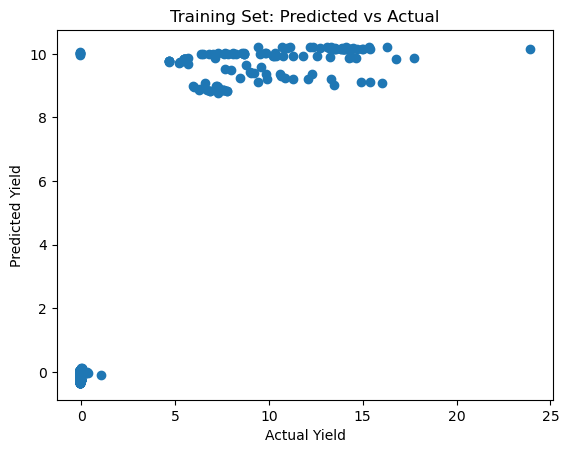

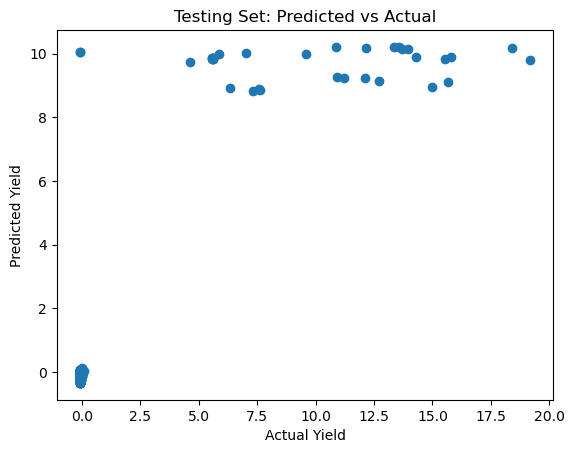

In [10]:
import matplotlib.pyplot as plt

# Visualize predicted vs actual for training set
plt.scatter(y_train, train_predictions)
plt.title('Training Set: Predicted vs Actual')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.show()

# Visualize predicted vs actual for testing set
plt.scatter(y_test, test_predictions)
plt.title('Testing Set: Predicted vs Actual')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.show()


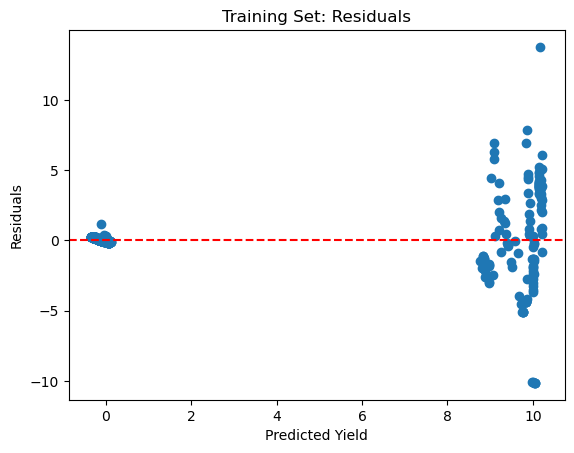

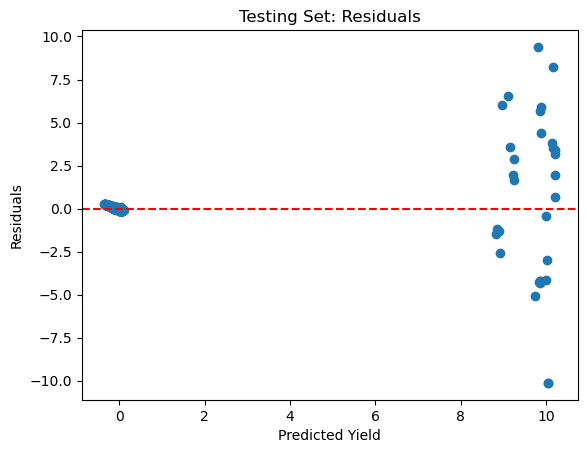

In [11]:
# Visualize residuals for training set
plt.scatter(train_predictions, y_train - train_predictions)
plt.title('Training Set: Residuals')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Visualize residuals for testing set
plt.scatter(test_predictions, y_test - test_predictions)
plt.title('Testing Set: Residuals')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [12]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regression model
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Predictions on the training set
train_predictions_tree = tree_model.predict(X_train)

# Predictions on the testing set
test_predictions_tree = tree_model.predict(X_test)

# Evaluate the model
train_rmse_tree = mean_squared_error(y_train, train_predictions_tree, squared=False)
test_rmse_tree = mean_squared_error(y_test, test_predictions_tree, squared=False)

train_r2_tree = r2_score(y_train, train_predictions_tree)
test_r2_tree = r2_score(y_test, test_predictions_tree)

print("Decision Tree Regression Model:")
print("Training RMSE:", train_rmse_tree)
print("Testing RMSE:", test_rmse_tree)
print("Training R^2 Score:", train_r2_tree)
print("Testing R^2 Score:", test_r2_tree)


Decision Tree Regression Model:
Training RMSE: 1.6460708807138785e-10
Testing RMSE: 0.15916102495267348
Training R^2 Score: 1.0
Testing R^2 Score: 0.9756117444679226


In [13]:
# Evaluate the Decision Tree Regression model
train_mse_tree = mean_squared_error(y_train, train_predictions_tree)
test_mse_tree = mean_squared_error(y_test, test_predictions_tree)

print("Decision Tree Regression Model:")
print("Training MSE:", train_mse_tree)
print("Testing MSE:", test_mse_tree)


Decision Tree Regression Model:
Training MSE: 2.7095493443341636e-20
Testing MSE: 0.025332231863985553


In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regression model
forest_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
forest_model.fit(X_train, y_train)

# Predictions on the training set
train_predictions_forest = forest_model.predict(X_train)

# Predictions on the testing set
test_predictions_forest = forest_model.predict(X_test)

# Evaluate the model
train_rmse_forest = mean_squared_error(y_train, train_predictions_forest, squared=False)
test_rmse_forest = mean_squared_error(y_test, test_predictions_forest, squared=False)

train_r2_forest = r2_score(y_train, train_predictions_forest)
test_r2_forest = r2_score(y_test, test_predictions_forest)

print("Random Forest Regression Model:")
print("Training RMSE:", train_rmse_forest)
print("Testing RMSE:", test_rmse_forest)
print("Training R^2 Score:", train_r2_forest)
print("Testing R^2 Score:", test_r2_forest)


Random Forest Regression Model:
Training RMSE: 0.0679124232118823
Testing RMSE: 0.11477869507304782
Training R^2 Score: 0.9953428336006088
Testing R^2 Score: 0.9873167705823237


In [15]:
# Evaluate the Random Forest Regression model
train_mse_forest = mean_squared_error(y_train, train_predictions_forest)
test_mse_forest = mean_squared_error(y_test, test_predictions_forest)

print("Random Forest Regression Model:")
print("Training MSE:", train_mse_forest)
print("Testing MSE:", test_mse_forest)


Random Forest Regression Model:
Training MSE: 0.004612097226509811
Testing MSE: 0.013174148842671691


In [16]:
import xgboost as xgb

# Convert data to DMatrix format, which is the internal data structure used by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the hyperparameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # 'reg:squarederror' for regression tasks
    'eval_metric': 'rmse',             # Root Mean Squared Error as the evaluation metric
    'seed': 42
}

# Train the XGBoost model
num_round = 100  # Number of boosting rounds (you can adjust this)
xgb_model = xgb.train(params, dtrain, num_round)

# Predictions on the training set
train_predictions_xgb = xgb_model.predict(dtrain)

# Predictions on the testing set
test_predictions_xgb = xgb_model.predict(dtest)

# Evaluate the model
train_rmse_xgb = mean_squared_error(y_train, train_predictions_xgb, squared=False)
test_rmse_xgb = mean_squared_error(y_test, test_predictions_xgb, squared=False)

train_r2_xgb = r2_score(y_train, train_predictions_xgb)
test_r2_xgb = r2_score(y_test, test_predictions_xgb)

print("XGBoost Regression Model:")
print("Training RMSE:", train_rmse_xgb)
print("Testing RMSE:", test_rmse_xgb)
print("Training R^2 Score:", train_r2_xgb)
print("Testing R^2 Score:", test_r2_xgb)


XGBoost Regression Model:
Training RMSE: 0.0017498725730574136
Testing RMSE: 0.2877262566235538
Training R^2 Score: 0.9999969080237463
Testing R^2 Score: 0.9202985406832407


In [17]:
# Evaluate the XGBoost Regression model
train_mse_xgb = mean_squared_error(y_train, train_predictions_xgb)
test_mse_xgb = mean_squared_error(y_test, test_predictions_xgb)

print("XGBoost Regression Model:")
print("Training MSE:", train_mse_xgb)
print("Testing MSE:", test_mse_xgb)


XGBoost Regression Model:
Training MSE: 3.0620540219385733e-06
Testing MSE: 0.08278639875060313


               Model  Training RMSE  Testing RMSE  Training R^2  Testing R^2  \
0  Linear Regression   3.816635e-01      0.453239      0.852910     0.802229   
1      Decision Tree   1.646071e-10      0.159161      1.000000     0.975612   
2      Random Forest   6.791242e-02      0.114779      0.995343     0.987317   
3            XGBoost   1.749873e-03      0.287726      0.999997     0.920299   

   Training MSE  Testing MSE  
0  1.456670e-01     0.205426  
1  2.709549e-20     0.025332  
2  4.612097e-03     0.013174  
3  3.062054e-06     0.082786  


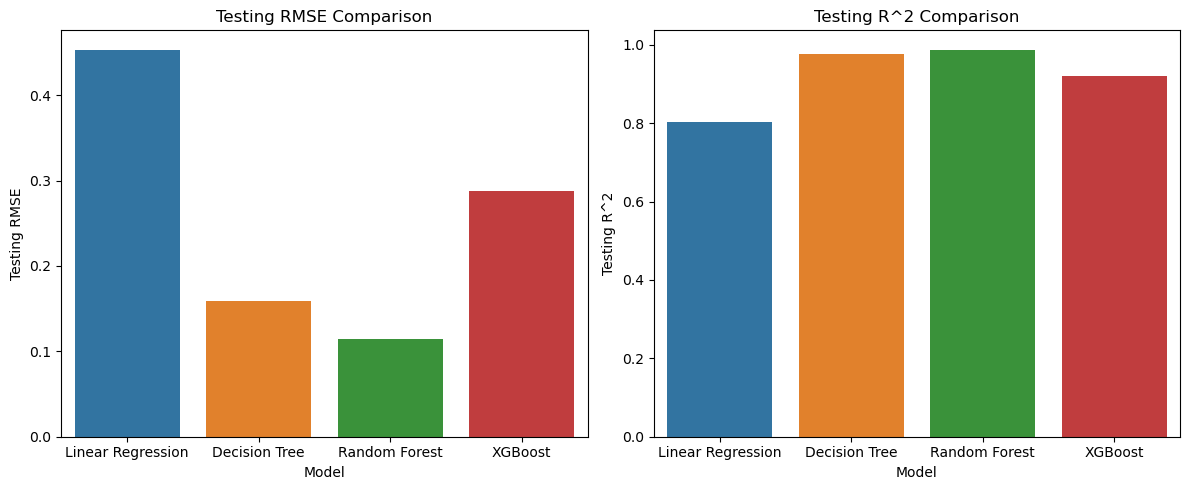

In [31]:
# Create a DataFrame to store the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Training RMSE': [train_rmse, train_rmse_tree, train_rmse_forest, train_rmse_xgb],
    'Testing RMSE': [test_rmse, test_rmse_tree, test_rmse_forest, test_rmse_xgb],
    'Training R^2': [train_r2, train_r2_tree, train_r2_forest, train_r2_xgb],
    'Testing R^2': [test_r2, test_r2_tree, test_r2_forest, test_r2_xgb],
    'Training MSE': [train_mse, train_mse_tree, train_mse_forest, train_mse_xgb],
    'Testing MSE': [test_mse, test_mse_tree, test_mse_forest, test_mse_xgb]
})

# Display the evaluation metrics
print(evaluation_metrics)

# Visualize RMSE and R^2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# RMSE comparison
sns.barplot(x='Model', y='Testing RMSE', data=evaluation_metrics, ax=ax1)
ax1.set_title('Testing RMSE Comparison')

# R^2 comparison
sns.barplot(x='Model', y='Testing R^2', data=evaluation_metrics, ax=ax2)
ax2.set_title('Testing R^2 Comparison')

plt.tight_layout()
plt.show()


In [20]:
# Assuming 'Yield' is your original target variable
# You can create a new column 'Yield_Category' based on yield levels
crop_data['Yield_Category'] = pd.cut(crop_data['Yield'], bins=[-np.inf, 0.33, 0.66, np.inf], labels=['Low Yield', 'Medium Yield', 'High Yield'])

# Drop the original 'Yield' column if you won't be using it for classification
crop_data.drop('Yield', axis=1, inplace=True)

# Check the distribution of the new 'Yield_Category' column
print(crop_data['Yield_Category'].value_counts())


Low Yield       19523
High Yield        165
Medium Yield        1
Name: Yield_Category, dtype: int64


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'Yield_Category' is your target variable for classification
X_classification = crop_data.drop('Yield_Category', axis=1)
y_classification = crop_data['Yield_Category']

# Split the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.25, random_state=42)

# Initialize the Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
tree_classifier.fit(X_train_class, y_train_class)

# Predictions on the training set
train_predictions_class = tree_classifier.predict(X_train_class)

# Predictions on the testing set
test_predictions_class = tree_classifier.predict(X_test_class)

# Evaluate the model
accuracy_train = accuracy_score(y_train_class, train_predictions_class)
accuracy_test = accuracy_score(y_test_class, test_predictions_class)

print("Decision Tree Classifier Model:")
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

# Print classification report and confusion matrix for the testing set
print("\nClassification Report:\n", classification_report(y_test_class, test_predictions_class))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_class, test_predictions_class))


Decision Tree Classifier Model:
Training Accuracy: 1.0
Testing Accuracy: 0.9997968718261223

Classification Report:
               precision    recall  f1-score   support

  High Yield       1.00      0.97      0.99        38
   Low Yield       1.00      1.00      1.00      4885

    accuracy                           1.00      4923
   macro avg       1.00      0.99      0.99      4923
weighted avg       1.00      1.00      1.00      4923


Confusion Matrix:
 [[  37    1]
 [   0 4885]]


In [30]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have already defined X_train_classification, X_test_classification, y_train_classification, y_test_classification

# Classification Model - Random Forest
random_forest_classifier = RandomForestClassifier(random_state=0)
random_forest_classifier.fit(X_train_class, y_train_class)
y_pred_random_forest_classification = random_forest_classifier.predict(X_test_class)

# Evaluate the Random Forest Classifier
accuracy_random_forest = accuracy_score(y_test_class, test_predictions_class)
confusion_matrix_random_forest = confusion_matrix(y_test_class, test_predictions_class)

print(f"Accuracy (Random Forest Classifier): {accuracy_random_forest}")
print("Confusion Matrix (Random Forest Classifier):\n", confusion_matrix_random_forest)


Accuracy (Random Forest Classifier): 0.9997968718261223
Confusion Matrix (Random Forest Classifier):
 [[  37    1]
 [   0 4885]]


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for 'Area' vs 'Yield'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=crop_data['Area'], y=crop_data['Yield'])
plt.xlabel('Area')
plt.ylabel( 'Yield' )
plt.title('Scatter Plot: Area vs Yield')
plt.show()

# Scatter plot for 'Production' vs 'Yield'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=crop_data['Production'], y=crop_data['Yield'])
plt.xlabel('Production')
plt.ylabel('Yield')
plt.title('Scatter Plot: Production vs Yield')
plt.show()

# Scatter plot for 'Annual_Rainfall' vs 'Yield'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=crop_data['Annual_Rainfall'], y=crop_data['Yield'])
plt.xlabel('Annual Rainfall')
plt.ylabel('Yield')
plt.title('Scatter Plot: Annual Rainfall vs Yield')
plt.show()

# Scatter plot for 'Fertilizer' vs 'Yield'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=crop_data['Fertilizer'], y=crop_data['Yield'])
plt.xlabel('Fertilizer')
plt.ylabel('Yield')
plt.title('Scatter Plot: Fertilizer vs Yield')
plt.show()

# Scatter plot for 'Pesticide' vs 'Yield'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=crop_data['Pesticide'], y=crop_data['Yield'])
plt.xlabel('Pesticide')
plt.ylabel('Yield')
plt.title('Scatter Plot: Pesticide vs Yield')
plt.show()


KeyError: 'Yield'

<Figure size 1000x600 with 0 Axes>

Index(['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide', 'Season_Kharif     ', 'Season_Rabi       ',
       'Season_Summer     ', 'Season_Whole Year ', 'Season_Winter     ',
       'State_Arunachal Pradesh', 'State_Assam', 'State_Bihar',
       'State_Chhattisgarh', 'State_Delhi', 'State_Goa', 'State_Gujarat',
       'State_Haryana', 'State_Himachal Pradesh', 'State_Jammu and Kashmir',
       'State_Jharkhand', 'State_Karnataka', 'State_Kerala',
       'State_Madhya Pradesh', 'State_Maharashtra', 'State_Manipur',
       'State_Meghalaya', 'State_Mizoram', 'State_Nagaland', 'State_Odisha',
       'State_Puducherry', 'State_Punjab', 'State_Sikkim', 'State_Tamil Nadu',
       'State_Telangana', 'State_Tripura', 'State_Uttar Pradesh',
       'State_Uttarakhand', 'State_West Bengal', 'Crop_Arhar/Tur',
       'Crop_Bajra', 'Crop_Banana', 'Crop_Barley', 'Crop_Black pepper',
       'Crop_Cardamom', 'Crop_Cashewnut', 'Crop_Castor seed', 'Crop_Coconut ',
   